<a href="https://colab.research.google.com/github/aidarshakerimov/FlapAI-Bird/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agent trained with Q-learning after 300 goal reachings
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
cumulative
-21.821522309711288
Length of episode
28.61315789473684
TS
386
success
Visualize environment Q-learning
[-5.65340943 -5.28483889 -4.7609321  -4.17881344 -3.53201494 -2.81334995
 -2.01491843 -1.12765401 -0.14244047 -0.37441112  0.94185005 -0.70766162
 -5.28483889 -4.88802539 -4.32002821 -3.68892023 -2.98768915 -2.2085435
 -1.34282611 -0.38092652  0.6871144   1.86379216  2.08791377  1.42451702
 -4.7609321  -4.32002821 -3.68892023 -2.98768915 -2.2085435  -1.34282611
 -0.38091791  0.687869    1.87541     3.19489816  4.66098768  4.065
 -4.47693357 -5.43231243 -4.92479159 -4.36087955 -3.73431061 -3.0380979
 -2.2645785  -1.405065   -0.4251      0.636       2.04        7.6
 -6.0459872   0.          0.          0.          0.          0.

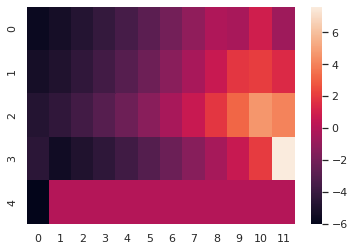

In [2]:
'''
This is the main file of the program. It processes command line arguments
and runs different Flappy Bird agents.
'''

import os, sys
sys.path.append('.')
sys.path.append('./game')
sys.path.append('./agents')
sys.path.append('./utils')
import argparse

from BaselineAgent import BaselineAgent
from QLearningAgent import QLearningAgent
from SARSAAgent import SARSAAgent
from FuncApproxLRAgent import FuncApproxLRAgent
from FuncApproxCNNAgent import FuncApproxCNNAgent
from FuncApproxDNNAgent import FuncApproxDNNAgent

import warnings
warnings.filterwarnings('ignore')


agent_options = ['Baseline' ,'QLearning', 'SARSA', 'FuncApproxLR', 'FuncApproxDNN', 'FuncApproxCNN']
order_options = ['forward', 'backward']


def parseArgs():
    ''' Reads command line arguments. '''
    parser = argparse.ArgumentParser(description = 'An AI Agent for Flappy Bird.',
                                     formatter_class = argparse.ArgumentDefaultsHelpFormatter)

    parser.add_argument('--algo', type = str, default = 'QLearning',
                        help = 'Learning algorithm.', choices = agent_options)
    
    # Parameters for Q-learning
    parser.add_argument('--rounding', type = int, default = None,
                        help = 'Level of discretization.')
    parser.add_argument('--probFlap', type = float, default = 0.1,
                        help = 'Probability of flappingin epsilon-greedy policy.')
    parser.add_argument('--order', type = str, default = 'forward',
                        choices = order_options, help = 'Order of Q-value updates.')
    parser.add_argument('--discount', type = float, default = 1.,
                        help = 'Discount factor.')
    parser.add_argument('--numTrainIters', type = int, default = 10000,
                        help = 'Number of training iterations.')
    parser.add_argument('--numTestIters', type = int, default = 1000,
                        help = 'Number of testing iterations.')
    parser.add_argument('--evalPerIters', type = int, default = 250,
                        help = 'Frequency of running evaluation.')
    parser.add_argument('--epsilon', type = float, default = 0.,
                        help = 'Epsilon-greedy policy.')
    parser.add_argument('--lr', type = float, default = 0.1,
                        help = 'Learning rate.')
    parser.add_argument('--epsilonDecay', action = 'store_true',
                        help = 'Use epsilon decay or not.')
    parser.add_argument('--lrDecay', action = 'store_true',
                        help = 'Use learning rate decay or not.')
    
    # Additional Parameters for Neural Networks.
    parser.add_argument('--resume', action = 'store_true',
                        help = 'Resume from checkpoints or not.')
    parser.add_argument('--seed', type = int, default = 0,
                        help = 'Random seed for PyTorch.')
    parser.add_argument('--batch-size', type = int, default = 32,
                        help = 'Size of a training minibatch.')
    parser.add_argument('--num-experience', type = int, default = 50000,
                        help = 'Number of past experiences stored in the memory.')
    
    args = parser.parse_known_args()[0]
    return args

    
def main():
    ''' Main program. '''
    print("Welcome to Flappy Bird.")
    args = parseArgs()
    
    if args.algo == 'Baseline':
        agent = BaselineAgent(actions = [0, 1], probFlap = args.probFlap)
        agent.train(numIters = args.numTrainIters, evalPerIters = args.evalPerIters,
                    numItersEval = args.numTestIters)
        
    elif args.algo == 'QLearning':
        agent = QLearningAgent(actions = [0, 1], rounding = args.rounding, probFlap = args.probFlap)
        agent.train(order = args.order, numIters = args.numTrainIters, epsilon = args.epsilon,
                    discount = args.discount, eta = args.lr, epsilonDecay = args.epsilonDecay,
                    etaDecay = args.lrDecay, evalPerIters = args.evalPerIters,
                    numItersEval = args.numTestIters)
        agent.saveQValues()
        
    elif args.algo == 'SARSA':
        agent = SARSAAgent(actions = [0, 1], rounding = args.rounding, probFlap = args.probFlap)
        agent.train(order = args.order, numIters = args.numTrainIters, epsilon = args.epsilon,
                    discount = args.discount, eta = args.lr, epsilonDecay = args.epsilonDecay,
                    etaDecay = args.lrDecay, evalPerIters = args.evalPerIters,
                    numItersEval = args.numTestIters)
        agent.saveQValues()
        
    elif args.algo == 'FuncApproxLR':
        agent = FuncApproxLRAgent(actions = [0, 1], probFlap = args.probFlap)
        agent.train(order = args.order, numIters = args.numTrainIters, epsilon = args.epsilon,
                    discount = args.discount, eta = args.lr, epsilonDecay = args.epsilonDecay,
                    etaDecay = args.lrDecay, evalPerIters = args.evalPerIters,
                    numItersEval = args.numTestIters)
        agent.saveWeights()
        
    elif args.algo == 'FuncApproxDNN':
        agent = FuncApproxDNNAgent(actions = [0, 1], probFlap = args.probFlap)
        agent.train(order = args.order, numIters = args.numTrainIters, epsilon = args.epsilon,
                    discount = args.discount, lr = args.lr, epsilonDecay = args.epsilonDecay,
                    lrDecay = args.lrDecay, evalPerIters = args.evalPerIters,
                    numItersEval = args.numTestIters, seed = args.seed, resume = args.resume)
        agent.saveModel()
        
    elif args.algo == 'FuncApproxCNN':
        agent = FuncApproxCNNAgent(actions = [0, 1], probFlap = args.probFlap)
        agent.train(numIters = args.numTrainIters, epsilon = args.epsilon, discount = args.discount,
                    batch_size = args.batch_size, lr = args.lr, num_experience = args.num_experience,
                    epsilonDecay = args.epsilonDecay, lrDecay = args.lrDecay,
                    evalPerIters = args.evalPerIters, numItersEval = args.numTestIters,
                    seed = args.seed, resume = args.resume)
        agent.saveModel()
        
        
if __name__ == '__main__':
    main()